## Definitions

In [6]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np

idx = pd.IndexSlice

plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

def load_and_transform_data(zip_file):
    with zipfile.ZipFile(zip_file) as z:
    # open the csv file in the dataset
        with z.open("Covid data/CovidDeaths.csv") as f:

            covid = pd.read_csv(f,index_col=['iso_code','date'], parse_dates=['date'], date_parser=lambda d: pd.to_datetime(d, format="%d-%m-%y"))

            country_columns = ['continent','location','population']
            countries = covid.groupby('iso_code').apply(lambda g: g.iloc[0][country_columns])
            
            countries = countries[countries.apply(lambda row: len(row.name) == 3,axis=1)]
            countries.continent = countries.continent.astype('category')

            keep_covid_columns = ['new_cases','new_deaths','icu_patients','hosp_patients']

            covid = covid[keep_covid_columns]
            covid = covid[covid.apply(lambda row: len(row.name[0]) == 3,axis=1)]

            covid = covid.sort_index()
    return covid.new_cases, covid.new_deaths, covid.icu_patients, covid.hosp_patients, countries

new_cases, new_deaths, icu_patients, hosp_patients, countries = load_and_transform_data('./data/covid.zip')


czech_cases = new_cases.loc[idx['CZE']]
slovak_cases = new_cases.loc[idx['SVK']]

print(countries.head())
print(slovak_cases.head())


              continent     location  population
iso_code                                        
ABW       North America        Aruba    106536.0
AFG                Asia  Afghanistan  40099462.0
AGO              Africa       Angola  34503774.0
AIA       North America     Anguilla     15753.0
ALB              Europe      Albania   2854710.0
date
2020-03-06    1.0
2020-03-07    0.0
2020-03-08    2.0
2020-03-09    2.0
2020-03-10    2.0
Name: new_cases, dtype: float64


# Lecture 7 - Pandas

by Vítek Macháček, inspired by Martin Hronec

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)

* built on top of NumPy
* Vast majority of your python data work should start and end in Pandas.
* Huge ecosystem that built around

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.


## `pd.Series` - labelled 1D object

###  Construction

Series can be created using:
* `dict`


```python 
pd.Series({'Vítek':31,'Martin':30, 'Honza':30})
```

* `list`, `tuple` or `np.array`


```python 
pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in range(10)],name='Age')
```

* scalar

```python
pd.Series(np.nan,index=['Vítek','Martin','Honza'],name='NANs')
```

Main attributes:

* `values` - collection of measurements, categories etc.
* `name` - column name
* `dtype` - datatype - `int`,`float`,`pd.Timestamp`,`object`
* `shape`

In [7]:
pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in range(10)],name='Age')

Person 0    86
Person 1    39
Person 2    95
Person 3    83
Person 4     7
Person 5     4
Person 6    27
Person 7    70
Person 8    98
Person 9    65
Name: Age, dtype: int32

In [8]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [9]:
czech_cases.name

'new_cases'

In [10]:
czech_cases.dtype

dtype('float64')

In [11]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [12]:
czech_cases.dtype

dtype('float64')

In [13]:
czech_cases.shape

(921,)

### Args / Kwargs

In [14]:
plotconfig

{'style': '.', 'grid': True, 'markersize': 5, 'figsize': (20, 6)}

<AxesSubplot:xlabel='date'>

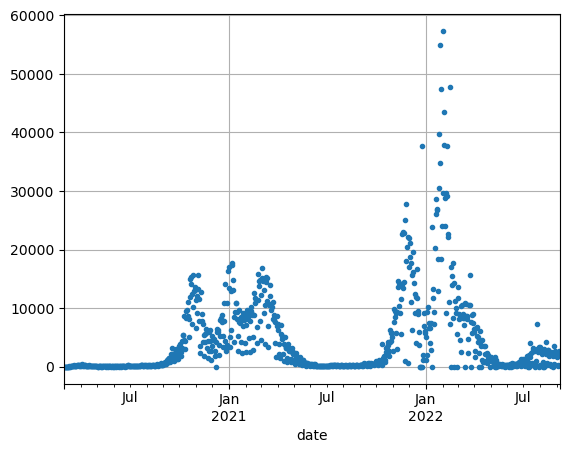

In [15]:
czech_cases.plot(style='.',grid=True)

<AxesSubplot:xlabel='date'>

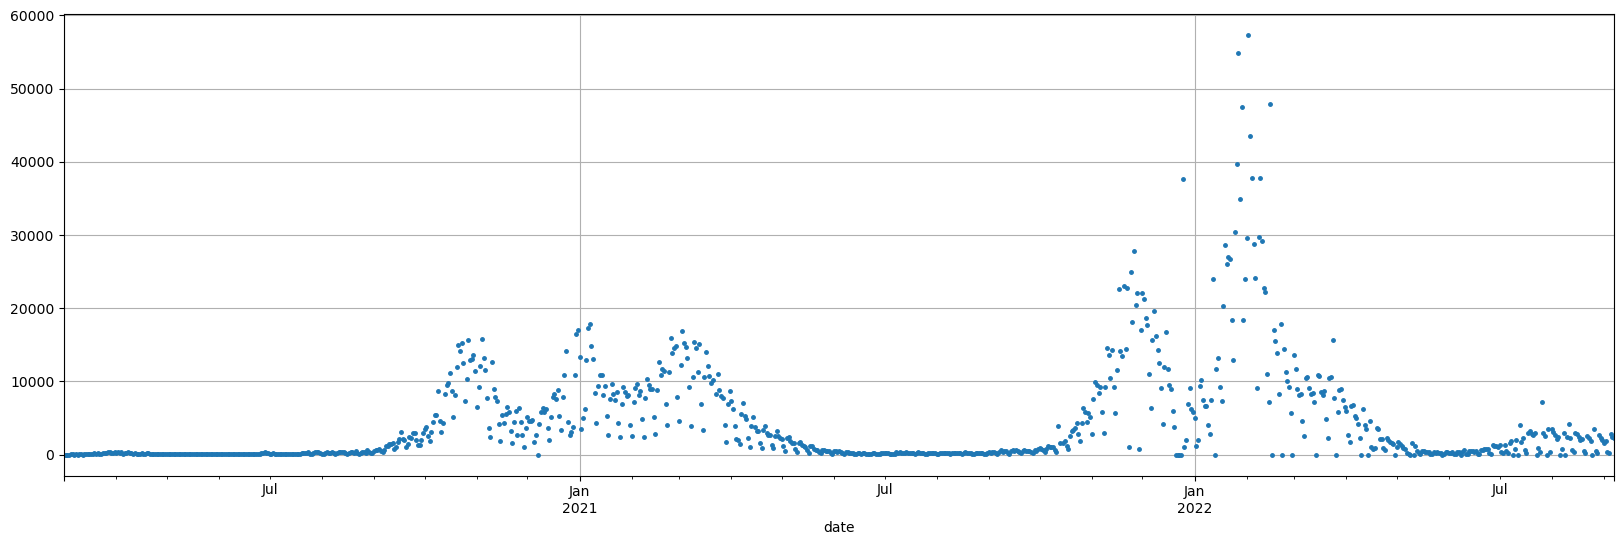

In [16]:
czech_cases.plot(**plotconfig)

In [17]:
czech_cases  +slovak_cases

date
2020-03-01       NaN
2020-03-02       NaN
2020-03-03       NaN
2020-03-04       NaN
2020-03-05       NaN
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Name: new_cases, Length: 921, dtype: float64

In [18]:
czech_cases.add(slovak_cases)# czech_cases + slovak_cases

date
2020-03-01       NaN
2020-03-02       NaN
2020-03-03       NaN
2020-03-04       NaN
2020-03-05       NaN
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Name: new_cases, Length: 921, dtype: float64

## Indexing data
### Using `loc` - selecting based on index labels

In [19]:
czech_cases['2020-12-24']

14149.0

<AxesSubplot:xlabel='date'>

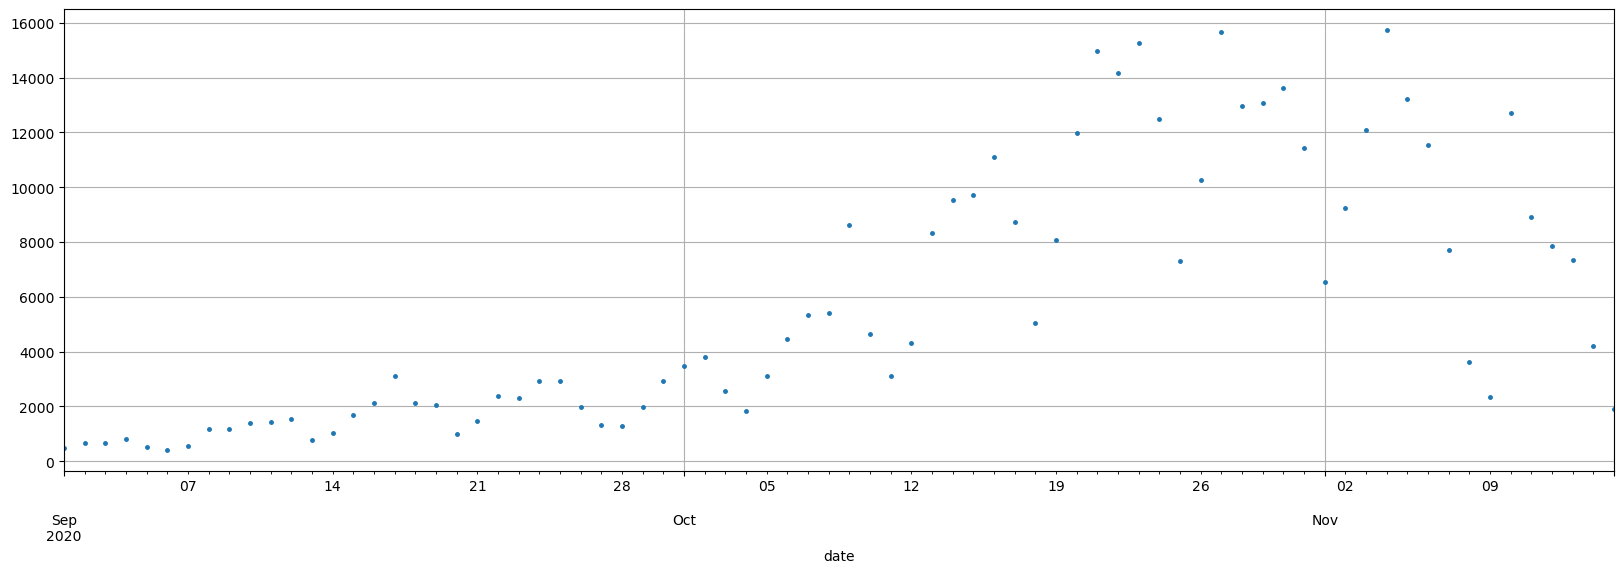

In [21]:
czech_cases.loc['2020-09-01':'2020-11-15'].plot(**plotconfig)

Do this only in exceptional cases

In [22]:
czech_cases.loc['2021-03-28'] += 1 

## Using `iloc` - selecting by order
* generally not recommended

In [23]:
czech_cases.iloc[0]

3.0

In [24]:
czech_cases.iloc[-1]

2287.0


### subsetting using `mask` - conditional on value of series

In [25]:
czech_cases[(czech_cases >= 5000) & (czech_cases < 15000)]

date
2020-10-07    5338.0
2020-10-08    5397.0
2020-10-09    8617.0
2020-10-13    8326.0
2020-10-14    9543.0
               ...  
2022-04-04    6579.0
2022-04-05    6729.0
2022-04-06    5305.0
2022-04-11    6155.0
2022-07-26    7241.0
Name: new_cases, Length: 210, dtype: float64

<AxesSubplot:xlabel='date'>

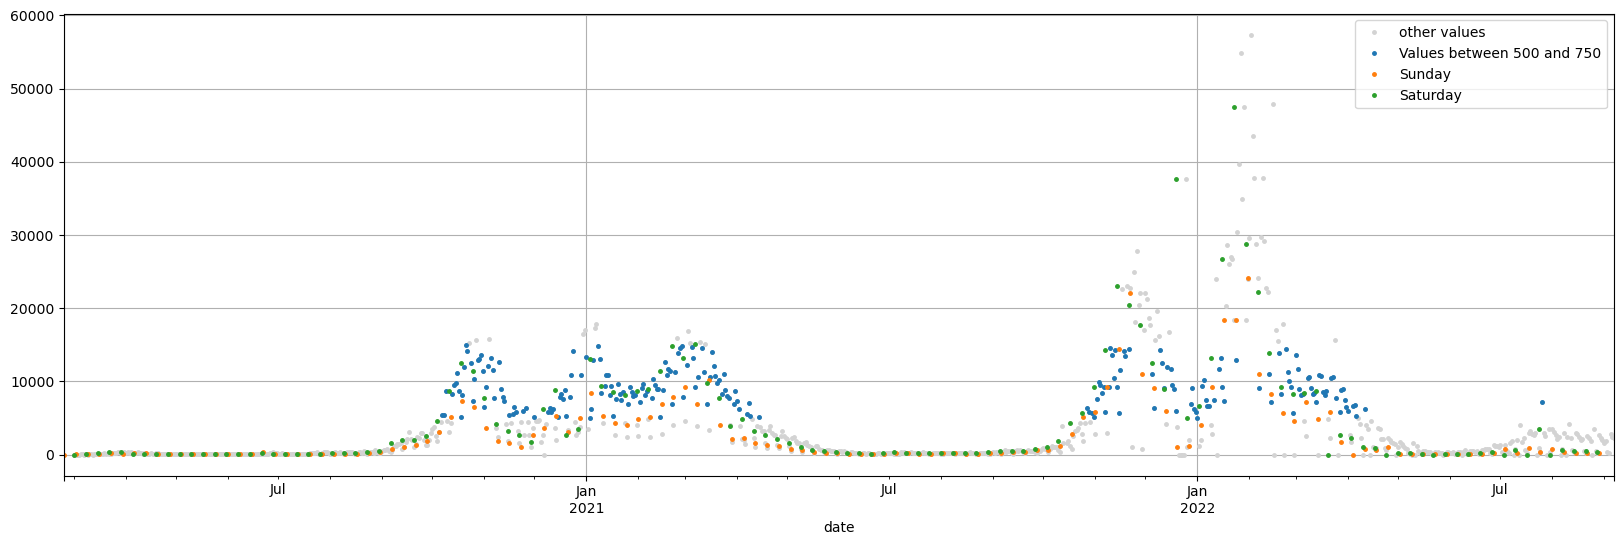

In [26]:
ax = czech_cases.plot(color = 'lightgrey',label='other values',legend=True,**plotconfig)
czech_cases[(czech_cases >= 5000) & (czech_cases < 15000)].plot(ax=ax,label='Values between 500 and 750',legend=True,**plotconfig)
czech_cases[czech_cases.index.weekday == 6].plot(ax=ax,label='Sunday',legend=True,**plotconfig)
czech_cases[czech_cases.index.weekday == 5].plot(ax=ax,label='Saturday',legend=True,**plotconfig)

In [27]:
czech_cases >= 5000

date
2020-03-01    False
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
              ...  
2022-09-03    False
2022-09-04    False
2022-09-05    False
2022-09-06    False
2022-09-07    False
Name: new_cases, Length: 921, dtype: bool

In [28]:
(czech_cases >= 5000) & (czech_cases < 15000)

date
2020-03-01    False
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
              ...  
2022-09-03    False
2022-09-04    False
2022-09-05    False
2022-09-06    False
2022-09-07    False
Name: new_cases, Length: 921, dtype: bool

In [29]:
czech_cases.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='date', length=921)

In [30]:
czech_cases[czech_cases.index.weekday == 6]

date
2020-03-01      3.0
2020-03-08     12.0
2020-03-15     64.0
2020-03-22    125.0
2020-03-29    186.0
              ...  
2022-08-07    801.0
2022-08-14    282.0
2022-08-21    202.0
2022-08-28    209.0
2022-09-04    179.0
Name: new_cases, Length: 132, dtype: float64

## `pd.DataFrame()` - 2D,tabular version of `pd.Series`

In [31]:
slovak_cases

date
2020-03-06    1.0
2020-03-07    0.0
2020-03-08    2.0
2020-03-09    2.0
2020-03-10    2.0
             ... 
2022-09-03    0.0
2022-09-04    0.0
2022-09-05    0.0
2022-09-06    0.0
2022-09-07    0.0
Name: new_cases, Length: 916, dtype: float64

<AxesSubplot:xlabel='date'>

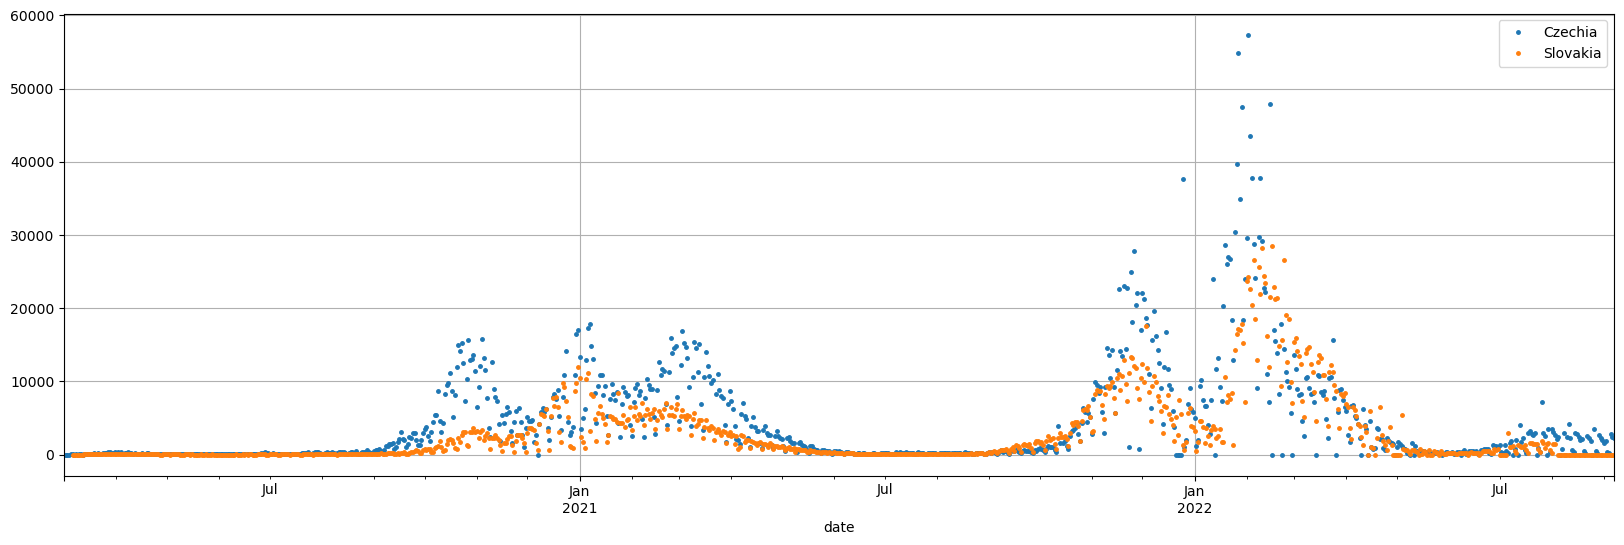

In [33]:
df = pd.DataFrame({'Czechia':czech_cases,'Slovakia':slovak_cases})
df.plot(**plotconfig)


### DataFrame construction from raw data:
#### row-wise: list into pd.DataFrame

Each member of the list is one row

* iterable with values
* pd.Series
* dict

#### column-wise dict into pd.DataFrame

**key** is the column name

**value** is the content (should be iterable)

## Input-Output


In [34]:
df.sample(5)

,Czechia,Slovakia
date,,
2021-08-06,167.0,86.0
2021-03-18,12028.0,3591.0
2021-04-17,3238.0,1586.0
2020-10-29,13055.0,3010.0
2020-07-22,246.0,37.0


In [35]:
df.shape

(921, 2)

In [36]:
df.dtypes

Czechia     float64
Slovakia    float64
dtype: object

In [37]:
df.iloc[0]

Czechia     3.0
Slovakia    NaN
Name: 2020-03-01 00:00:00, dtype: float64

In [40]:
df['Czechia'] # or df.Czechia

date
2020-03-01       3.0
2020-03-02       0.0
2020-03-03       2.0
2020-03-04       3.0
2020-03-05       4.0
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Freq: D, Name: Czechia, Length: 921, dtype: float64

In [41]:
df

,Czechia,Slovakia
date,,
2020-03-01,3.0,NaN
2020-03-02,0.0,NaN
2020-03-03,2.0,NaN
2020-03-04,3.0,NaN
2020-03-05,4.0,NaN
...,...,...
2022-09-03,379.0,0.0
2022-09-04,179.0,0.0
2022-09-05,2761.0,0.0


In [42]:
df.stack().index

MultiIndex([('2020-03-01',  'Czechia'),
            ('2020-03-02',  'Czechia'),
            ('2020-03-03',  'Czechia'),
            ('2020-03-04',  'Czechia'),
            ('2020-03-05',  'Czechia'),
            ('2020-03-06',  'Czechia'),
            ('2020-03-06', 'Slovakia'),
            ('2020-03-07',  'Czechia'),
            ('2020-03-07', 'Slovakia'),
            ('2020-03-08',  'Czechia'),
            ...
            ('2022-09-03',  'Czechia'),
            ('2022-09-03', 'Slovakia'),
            ('2022-09-04',  'Czechia'),
            ('2022-09-04', 'Slovakia'),
            ('2022-09-05',  'Czechia'),
            ('2022-09-05', 'Slovakia'),
            ('2022-09-06',  'Czechia'),
            ('2022-09-06', 'Slovakia'),
            ('2022-09-07',  'Czechia'),
            ('2022-09-07', 'Slovakia')],
           names=['date', None], length=1833)

In [43]:
df.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq='D')

## Deeper look at the `index`

In [44]:
df.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq='D')

In [45]:
df.index.dtype

dtype('<M8[ns]')

## Dtypes

* **Numeric** - `int64` and `float64`

* **Datetime** - `datetime64[ns]`
    - Datetimes can be timezone-aware
    - variable precision
    - see `pd.to_datetime`

* **Categorical**
    - set of values specified in advance
    - efficient performance
    - possible to specify ordering (`strongly agree` vs. `agree`)

* **Object** - everything else
    - most often str
    - But also list or virtually anything

* **Custom datatypes**
    - geometry in geopandas


In [46]:
df.columns

Index(['Czechia', 'Slovakia'], dtype='object')

## Path to `MultiIndex`

In [47]:
new_cases

iso_code  date      
ABW       2020-03-13     2.0
          2020-03-14     0.0
          2020-03-15     0.0
          2020-03-16     0.0
          2020-03-17     1.0
                        ... 
ZWE       2022-09-03    11.0
          2022-09-04     8.0
          2022-09-05     6.0
          2022-09-06    13.0
          2022-09-07    43.0
Name: new_cases, Length: 201117, dtype: float64

In [48]:
new_cases.unstack('iso_code')

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


In [49]:
new_cases

iso_code  date      
ABW       2020-03-13     2.0
          2020-03-14     0.0
          2020-03-15     0.0
          2020-03-16     0.0
          2020-03-17     1.0
                        ... 
ZWE       2022-09-03    11.0
          2022-09-04     8.0
          2022-09-05     6.0
          2022-09-06    13.0
          2022-09-07    43.0
Name: new_cases, Length: 201117, dtype: float64

In [50]:
new_cases.index

MultiIndex([('ABW', '2020-03-13'),
            ('ABW', '2020-03-14'),
            ('ABW', '2020-03-15'),
            ('ABW', '2020-03-16'),
            ('ABW', '2020-03-17'),
            ('ABW', '2020-03-18'),
            ('ABW', '2020-03-19'),
            ('ABW', '2020-03-20'),
            ('ABW', '2020-03-21'),
            ('ABW', '2020-03-22'),
            ...
            ('ZWE', '2022-08-29'),
            ('ZWE', '2022-08-30'),
            ('ZWE', '2022-08-31'),
            ('ZWE', '2022-09-01'),
            ('ZWE', '2022-09-02'),
            ('ZWE', '2022-09-03'),
            ('ZWE', '2022-09-04'),
            ('ZWE', '2022-09-05'),
            ('ZWE', '2022-09-06'),
            ('ZWE', '2022-09-07')],
           names=['iso_code', 'date'], length=201117)

In [51]:
new_cases.loc[('CZE','2020-12-24')]

14149.0

if slicing or multi-selecting use `idx = pd.IndexSlice` (in definitions)

In [52]:
czechoslovak_christmas = new_cases.loc[idx[['CZE','SVK'],'2020-12-24':'2020-12-27']] #
czechoslovak_christmas

iso_code  date      
CZE       2020-12-24    14149.0
          2020-12-25     4402.0
          2020-12-26     2706.0
          2020-12-27     3030.0
SVK       2020-12-24     7354.0
          2020-12-25     5064.0
          2020-12-26     1182.0
          2020-12-27     1086.0
Name: new_cases, dtype: float64

## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `pd.Series` into `pd.DataFrame`: `.unstack`

In [53]:
czechoslovak_christmas.unstack()

date,2020-12-24,2020-12-25,2020-12-26,2020-12-27
iso_code,,,,
CZE,14149.0,4402.0,2706.0,3030.0
SVK,7354.0,5064.0,1182.0,1086.0


In [54]:
new_cases.head()

iso_code  date      
ABW       2020-03-13    2.0
          2020-03-14    0.0
          2020-03-15    0.0
          2020-03-16    0.0
          2020-03-17    1.0
Name: new_cases, dtype: float64

In [55]:
new_cases.unstack('iso_code')

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


### Stack `pd.DataFrame` to `pd.Series`


In [56]:
df.stack()

date                
2020-03-01  Czechia        3.0
2020-03-02  Czechia        0.0
2020-03-03  Czechia        2.0
2020-03-04  Czechia        3.0
2020-03-05  Czechia        4.0
                         ...  
2022-09-05  Slovakia       0.0
2022-09-06  Czechia     2458.0
            Slovakia       0.0
2022-09-07  Czechia     2287.0
            Slovakia       0.0
Length: 1833, dtype: float64

## Applying functions

### on `pd.Series`

#### Aggregation
- decreasing dimensionality

In [57]:
czech_cases.mean()

4415.204570184984

In [58]:
czech_cases.min()

0.0

In [59]:
czech_cases.sum()

4057573.0

In [60]:
czech_cases.agg([np.mean,np.max,np.mean,np.median,np.std])

mean       4415.204570
amax      57378.000000
mean       4415.204570
median     1186.000000
std        7038.479926
Name: new_cases, dtype: float64

### Transforming
* preserves dimensionality and shape

In [61]:
czech_cases.diff()

date
2020-03-01       NaN
2020-03-02      -3.0
2020-03-03       2.0
2020-03-04       1.0
2020-03-05       1.0
               ...  
2022-09-03   -1479.0
2022-09-04    -200.0
2022-09-05    2582.0
2022-09-06    -303.0
2022-09-07    -171.0
Name: new_cases, Length: 921, dtype: float64

In [62]:
czech_cases.apply(np.log)

date
2020-03-01    1.098612
2020-03-02        -inf
2020-03-03    0.693147
2020-03-04    1.098612
2020-03-05    1.386294
                ...   
2022-09-03    5.937536
2022-09-04    5.187386
2022-09-05    7.923348
2022-09-06    7.807103
2022-09-07    7.734996
Name: new_cases, Length: 921, dtype: float64

In [63]:
czech_cases.cumsum()

date
2020-03-01          3.0
2020-03-02          3.0
2020-03-03          5.0
2020-03-04          8.0
2020-03-05         12.0
                ...    
2022-09-03    4049888.0
2022-09-04    4050067.0
2022-09-05    4052828.0
2022-09-06    4055286.0
2022-09-07    4057573.0
Name: new_cases, Length: 921, dtype: float64

In [64]:
czech_cases.pct_change()

date
2020-03-01          NaN
2020-03-02    -1.000000
2020-03-03          inf
2020-03-04     0.500000
2020-03-05     0.333333
                ...    
2022-09-03    -0.796017
2022-09-04    -0.527704
2022-09-05    14.424581
2022-09-06    -0.109743
2022-09-07    -0.069569
Name: new_cases, Length: 921, dtype: float64

#### Custom functions

In [65]:
unit_variance(czech_cases)

NameError: name 'unit_variance' is not defined

In [66]:
df

,Czechia,Slovakia
date,,
2020-03-01,3.0,NaN
2020-03-02,0.0,NaN
2020-03-03,2.0,NaN
2020-03-04,3.0,NaN
2020-03-05,4.0,NaN
...,...,...
2022-09-03,379.0,0.0
2022-09-04,179.0,0.0
2022-09-05,2761.0,0.0


In [67]:
df.apply(lambda series: (series - np.mean(series)) / np.std(series))

,Czechia,Slovakia
date,,
2020-03-01,-0.627210,NaN
2020-03-02,-0.627637,NaN
2020-03-03,-0.627352,NaN
2020-03-04,-0.627210,NaN
2020-03-05,-0.627068,NaN
...,...,...
2022-09-03,-0.573761,-0.613694
2022-09-04,-0.602191,-0.613694
2022-09-05,-0.235151,-0.613694


In [68]:
czech_cases.apply(lambda x: (x**2) -25)

date
2020-03-01        -16.0
2020-03-02        -25.0
2020-03-03        -21.0
2020-03-04        -16.0
2020-03-05         -9.0
                ...    
2022-09-03     143616.0
2022-09-04      32016.0
2022-09-05    7623096.0
2022-09-06    6041739.0
2022-09-07    5230344.0
Name: new_cases, Length: 921, dtype: float64

## Applying functions on `pd.DataFrame`
### Aggregating

In [69]:
df

,Czechia,Slovakia
date,,
2020-03-01,3.0,NaN
2020-03-02,0.0,NaN
2020-03-03,2.0,NaN
2020-03-04,3.0,NaN
2020-03-05,4.0,NaN
...,...,...
2022-09-03,379.0,0.0
2022-09-04,179.0,0.0
2022-09-05,2761.0,0.0


In [70]:
df.sum()

Czechia     4057573.0
Slovakia    2585060.0
dtype: float64

In [75]:
df.sum(axis=1)

date
2020-03-01       3.0
2020-03-02       0.0
2020-03-03       2.0
2020-03-04       3.0
2020-03-05       4.0
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Freq: D, Length: 921, dtype: float64

### Custom function on `pd.DataFrame`

In [76]:
df

,Czechia,Slovakia
date,,
2020-03-01,3.0,NaN
2020-03-02,0.0,NaN
2020-03-03,2.0,NaN
2020-03-04,3.0,NaN
2020-03-05,4.0,NaN
...,...,...
2022-09-03,379.0,0.0
2022-09-04,179.0,0.0
2022-09-05,2761.0,0.0


In [77]:
def describe_day(row):
    date = row.name
    return f'On {date.day_name()} of {date.month_name()} {date.day}, {date.year}, there were {row.Czechia} cases in Czechia and {row.Slovakia} cases in Slovakia'
df.apply(describe_day,axis=1)

date
2020-03-01    On Sunday of March 1, 2020, there were 3.0 cas...
2020-03-02    On Monday of March 2, 2020, there were 0.0 cas...
2020-03-03    On Tuesday of March 3, 2020, there were 2.0 ca...
2020-03-04    On Wednesday of March 4, 2020, there were 3.0 ...
2020-03-05    On Thursday of March 5, 2020, there were 4.0 c...
                                    ...                        
2022-09-03    On Saturday of September 3, 2022, there were 3...
2022-09-04    On Sunday of September 4, 2022, there were 179...
2022-09-05    On Monday of September 5, 2022, there were 276...
2022-09-06    On Tuesday of September 6, 2022, there were 24...
2022-09-07    On Wednesday of September 7, 2022, there were ...
Freq: D, Length: 921, dtype: object

In [81]:
def describe_country(col):
    return (f'Between {col.index.min():%Y/%m/%d} and {col.index.max():%Y/%m/%d} there were on average {col.mean()} with standard deviation {col.std()}')

df.apply(describe_country,axis=0)

Czechia     Between 2020/03/01 and 2022/09/07 there were o...
Slovakia    Between 2020/03/01 and 2022/09/07 there were o...
dtype: object

### Combine `.apply` with reshaping

In [85]:
cntr_cases = new_cases.unstack('iso_code')
cntr_cases

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


In [89]:
new_cases.unstack(['date']).median()

date
2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-04     NaN
2020-01-05     NaN
              ... 
2022-09-04     0.0
2022-09-05    10.5
2022-09-06    12.5
2022-09-07    17.0
2022-09-08     NaN
Length: 982, dtype: float64

In [90]:
cntr_cases.median(axis=1)

date
2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-04     NaN
2020-01-05     NaN
              ... 
2022-09-04     0.0
2022-09-05    10.5
2022-09-06    12.5
2022-09-07    17.0
2022-09-08     NaN
Length: 982, dtype: float64

In [99]:
cntr_cases.apply([np.mean,np.median,np.std],axis=0)

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
mean,47.271727,210.832432,113.787140,4.307606,362.010953,50.122826,1068.605456,10578.450873,475.219804,9.896362,...,8.155481,NaN,11917.238790,17.917293,1.104499,24.034901,13.559091,4361.200873,368.528761,285.051054
median,14.000000,76.000000,45.000000,0.000000,157.000000,3.000000,873.000000,5348.000000,229.000000,0.000000,...,0.000000,NaN,100.000000,0.000000,0.000000,0.000000,3.000000,1982.500000,89.000000,52.000000
std,116.364155,358.564775,259.834685,16.501125,470.373529,150.118731,915.576111,18341.539093,636.245131,35.524457,...,43.061759,NaN,41701.983034,62.419327,8.381915,106.503194,24.929136,5319.728432,720.827153,758.876752


In [95]:
print(cntr_cases.shape[0])

982


<AxesSubplot:xlabel='iso_code'>

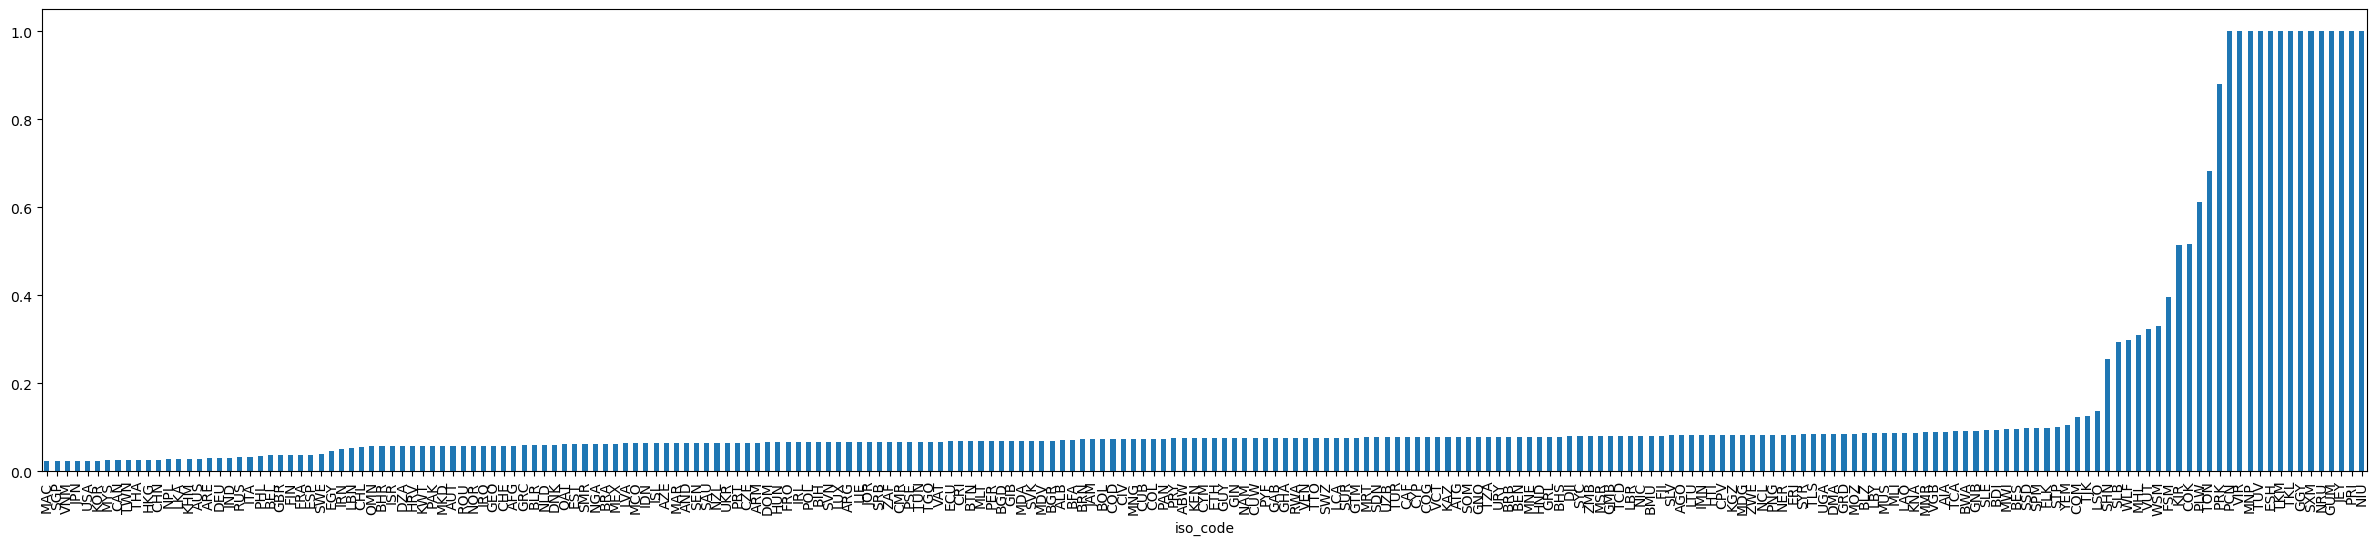

In [100]:
def share_of_missing(col):
    return col.isna().sum()/col.shape[0]
cntr_cases.apply(share_of_missing).sort_values().plot.bar(figsize=(30,6))

In [101]:
cntr_cases

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


In [104]:
cntr_cases.apply(lambda time_series: pd.Series({'date':time_series.idxmax(),'value':time_series.max()})).T

,date,value
iso_code,,
ABW,2022-01-05,1162.0
AFG,2021-06-17,3243.0
AGO,2021-12-28,5035.0
AIA,2022-05-10,196.0
ALB,2022-01-09,4789.0
...,...,...
WSM,2022-04-26,1166.0
YEM,2022-02-08,287.0
ZAF,2021-12-12,37875.0


### Row-wise

- "best in covid"

In [105]:
def get_best_in_covid(row):
    return pd.Series({'best':row.idxmax(),'value':row.max()})
cntr_cases.apply(get_best_in_covid,axis='columns').best.value_counts().sort_values()

GRC      1
NLD      1
IRN      2
ESP      2
IDN      3
VNM      3
TUR      4
RUS      9
GBR     10
TWN     12
ITA     24
FRA     29
DEU     31
CHN     33
JPN     40
KOR     55
BRA     76
IND    156
USA    468
Name: best, dtype: int64

## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


In [117]:
covid = pd.DataFrame({
    'new_cases':new_cases,
    'new_deaths':new_deaths
}).join(countries)
covid

new_cases  new_deaths      continent  location  \
iso_code date                                                         
ABW      2020-03-13        2.0         NaN  North America     Aruba   
         2020-03-14        0.0         NaN  North America     Aruba   
         2020-03-15        0.0         NaN  North America     Aruba   
         2020-03-16        0.0         NaN  North America     Aruba   
         2020-03-17        1.0         NaN  North America     Aruba   
...                        ...         ...            ...       ...   
ZWE      2022-09-03       11.0         0.0         Africa  Zimbabwe   
         2022-09-04        8.0         0.0         Africa  Zimbabwe   
         2022-09-05        6.0         0.0         Africa  Zimbabwe   
         2022-09-06       13.0         0.0         Africa  Zimbabwe   
         2022-09-07       43.0         0.0         Africa  Zimbabwe   

                     population  
iso_code date                    
ABW      2020-03-13    106536.0  
         2020-03-14    106536.0  
         2020-03-15    106536.0  
         2020-03-16    106536.0  
         2020-03-17    106536.0  
...                         ...  
ZWE      2022-09-03  15993524.0  
         2022-09-04  15993524.0  
         2022-09-05  15993524.0  
         2022-09-06  15993524.0  
         2022-09-07  15993524.0  

[201117 rows x 5 columns]

In [127]:
covid.groupby('continent').median()

,new_cases,new_deaths,population
continent,,,
Africa,9.0,0.0,13461888.0
Asia,224.0,2.0,19196465.0
Europe,314.0,4.0,5403021.0
North America,4.0,0.0,190338.0
Oceania,0.0,0.0,218764.0
South America,531.0,13.0,17797737.0


<AxesSubplot:xlabel='date'>

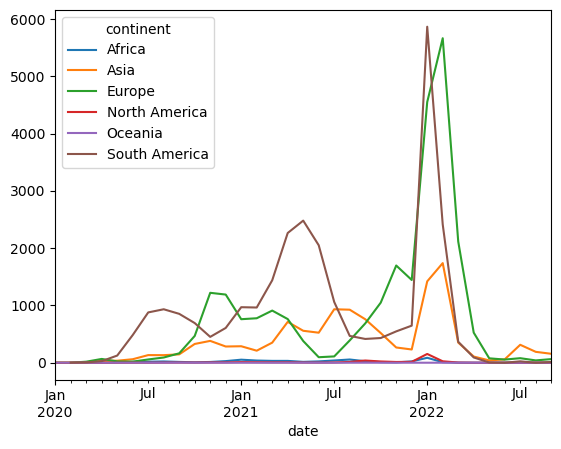

In [132]:
covid.groupby(['continent', pd.Grouper(level='date',freq='M')]).new_cases.median().unstack('continent').plot()

### Vítek's messy analytics one-liners

<AxesSubplot:title={'center':'Median cases in month in continent'}, xlabel='date'>

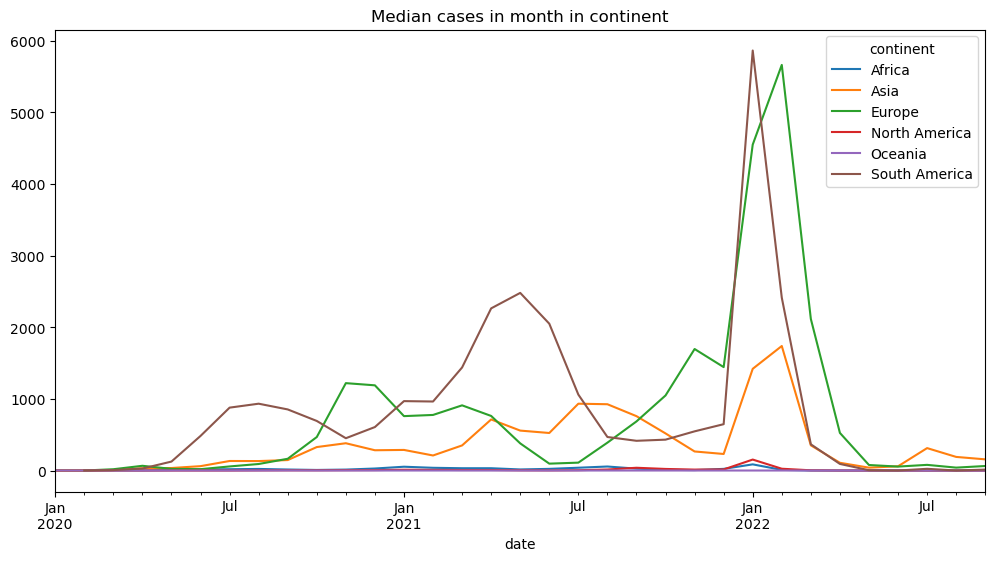

In [133]:
covid.groupby(['continent', pd.Grouper(level='date',freq='M')]).new_cases.median().unstack('continent').plot(figsize=(12,6),title='Median cases in month in continent')

### Group By + Apply

In [134]:
interesting_countries = ['Austria', 'Poland', 'Germany', 'Czechia', 'Slovakia', 'Hungary', 'France', 'Denmark', 'Sweden']

some_countries = covid[covid.location.isin(interesting_countries)]
some_countries['deaths_per_case'] = some_countries.new_deaths/some_countries.new_cases
some_countries

C:\Users\frant\AppData\Local\Temp\ipykernel_4748\2047160843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_countries['deaths_per_case'] = some_countries.new_deaths/some_countries.new_cases


new_cases  new_deaths continent location  population  \
iso_code date                                                               
AUT      2020-02-25        2.0         NaN    Europe  Austria   8922082.0   
         2020-02-26        NaN         NaN    Europe  Austria   8922082.0   
         2020-02-27        0.0         NaN    Europe  Austria   8922082.0   
         2020-02-28        0.0         NaN    Europe  Austria   8922082.0   
         2020-02-29        2.0         NaN    Europe  Austria   8922082.0   
...                        ...         ...       ...      ...         ...   
SWE      2022-09-03        NaN         NaN    Europe   Sweden  10467097.0   
         2022-09-04        NaN         NaN    Europe   Sweden  10467097.0   
         2022-09-05        NaN         NaN    Europe   Sweden  10467097.0   
         2022-09-06        NaN         NaN    Europe   Sweden  10467097.0   
         2022-09-07        NaN         NaN    Europe   Sweden  10467097.0   

                     deaths_per_case  
iso_code date                         
AUT      2020-02-25              NaN  
         2020-02-26              NaN  
         2020-02-27              NaN  
         2020-02-28              NaN  
         2020-02-29              NaN  
...                              ...  
SWE      2022-09-03              NaN  
         2022-09-04              NaN  
         2022-09-05              NaN  
         2022-09-06              NaN  
         2022-09-07              NaN  

[8415 rows x 6 columns]

In [136]:
country_names = pd.Series({'AUT':'Austria','SWE':'Sweden'})

In [137]:
some_countries.new_cases.index.get_level_values('iso_code').map(country_names)

Index(['Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria',
       'Austria', 'Austria', 'Austria', 'Austria',
       ...
        'Sweden',  'Sweden',  'Sweden',  'Sweden',  'Sweden',  'Sweden',
        'Sweden',  'Sweden',  'Sweden',  'Sweden'],
      dtype='object', name='iso_code', length=8415)

<AxesSubplot:title={'center':'Median cases per capita in Europe monthly'}, xlabel='date'>

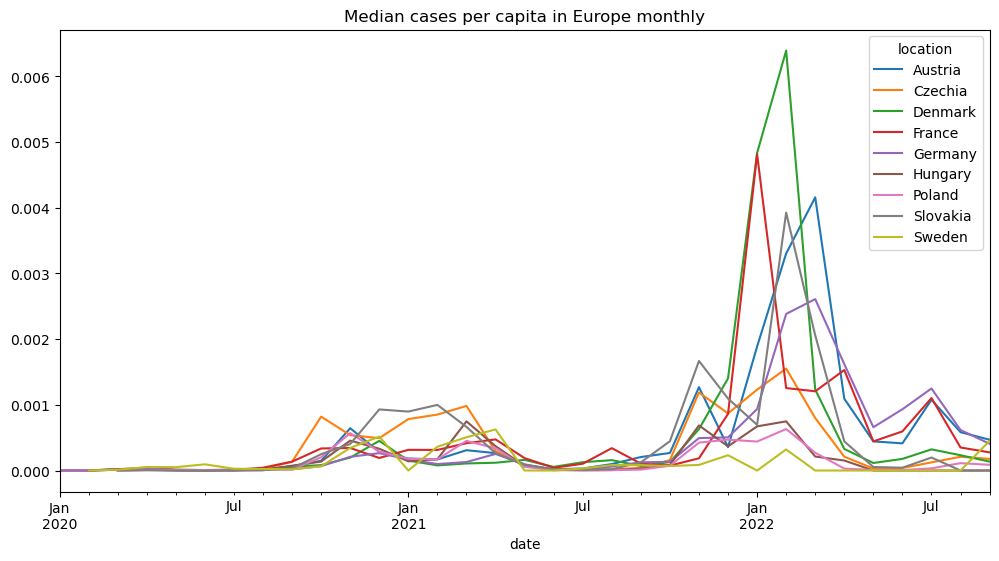

In [138]:
some_countries.groupby(['location',pd.Grouper(level='date',freq='M')]).apply(lambda g: g.new_cases.median()/g.population.iloc[0]).unstack('location').plot(title='Median cases per capita in Europe monthly',figsize=(12,6))

<AxesSubplot:title={'center':'Median deaths per case monthly'}, xlabel='date'>

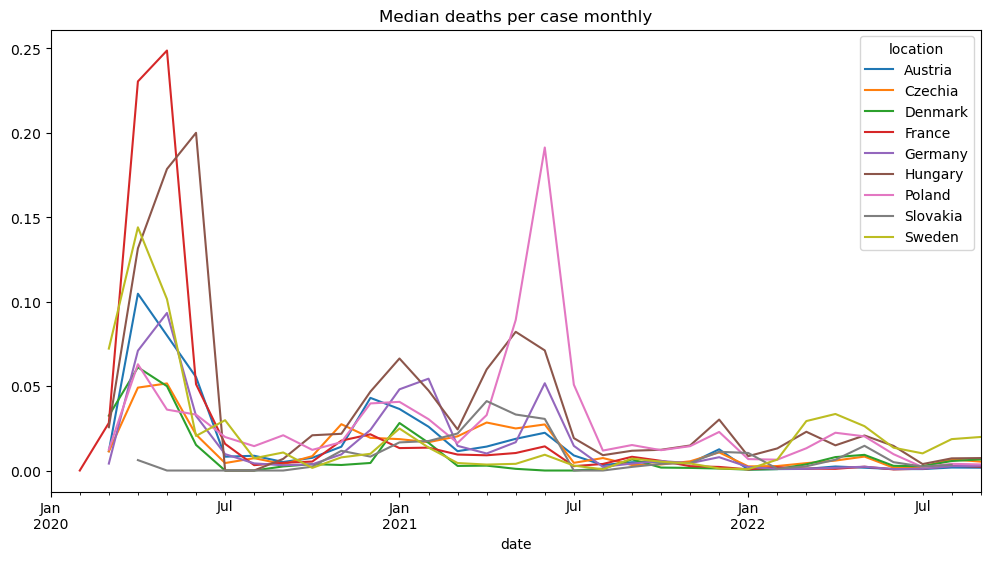

In [139]:
some_countries.groupby(['location',pd.Grouper(level='date',freq='M')]).deaths_per_case.median().unstack('location').plot(title='Median deaths per case monthly',figsize=(12,6))

<AxesSubplot:ylabel='iso_code'>

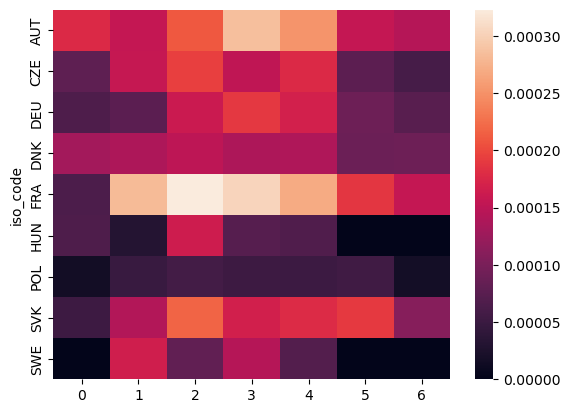

In [140]:
sns.heatmap(some_countries.groupby(['iso_code',lambda idx: idx[1].weekday()]).apply(lambda g: g.new_cases.median()/g.population.iloc[0]).unstack(1))

In [141]:

filenames = []


pd.concat([pd.read_csv(file).assign(filname=file) for file in filenames])

ValueError: No objects to concatenate

## Merging and joing datasets

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - alignment (along index or columns)
* `pd.merge` - combining data (along columns, by values)
    * `df.join` - merge on index


### Concatenate
![concatenate](./img/concatenate.png)

### Merge
![merge](./img/merge.png)



## Rolling object

<AxesSubplot:xlabel='date'>

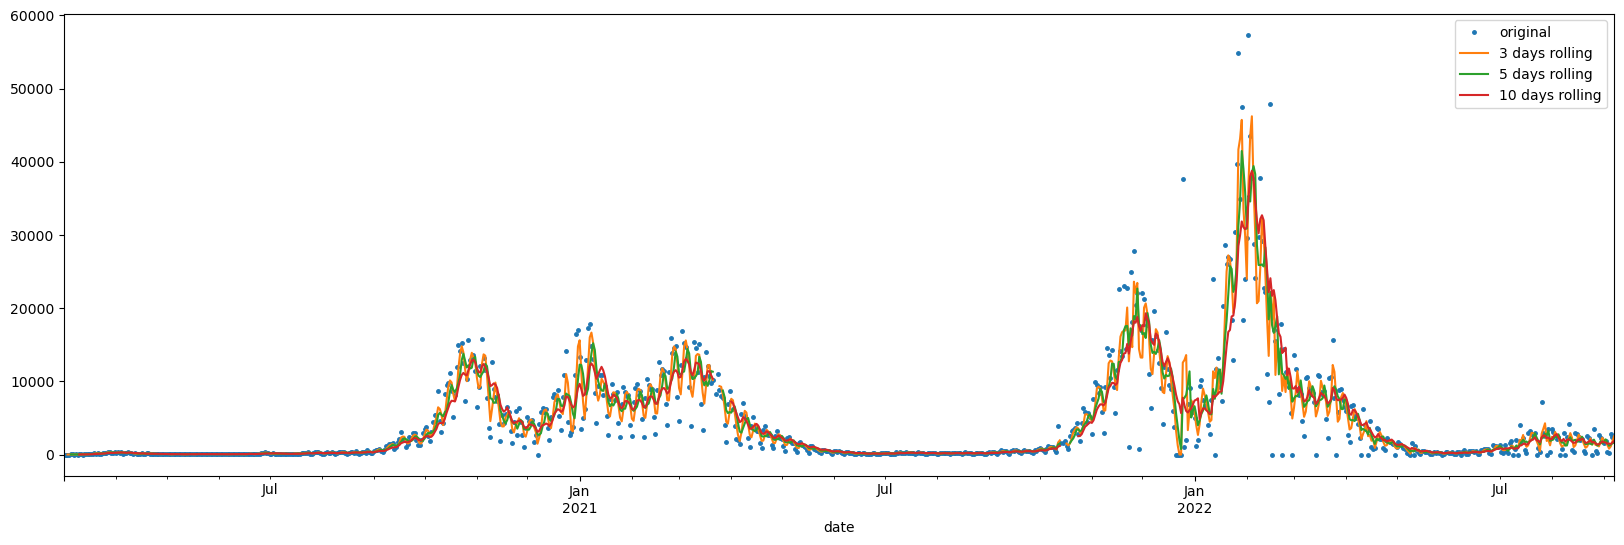

In [144]:
ax = czech_cases.plot(label='original',**plotconfig,legend=True)
czech_cases.rolling(3).mean().plot(label='3 days rolling',ax=ax,legend=True)
czech_cases.rolling(5).mean().plot(label='5 days rolling',ax=ax,legend=True)
czech_cases.rolling(10).mean().plot(label='10 days rolling',ax=ax,legend=True)